# Implementación de Algoritmo de Deutsch y Deutsch-Jozsa

1. Implemente las 4 funciones posibles de {0,1} a {0,1} usando el computador cuántico de IBM.
    - Dibujo de función
    - Matriz correpondiente
    - Circuito correspondiente
    - Resultados de las 4 pruebas
2. Verifique que el algoritmos de Deutsch funciona para comprobar cuáles de estas funciones son balanceadas o constantes.
    - Circuito
    - Resultados
3. Implemente al menos 4 funciones con n= 4 (3 balanceadas y una constante) para probar el funcionamiento del algoritmo Deustch-Jozsa
    - Dibujo función
    - Matriz correspondiente (Generada por computador)
    - Circuito
    - Pruebas
    - Prueba del experimento Deutsch-Jozsa
4. Explique sus resultados.
    - En cada sección explique sus resultados con textos y ecuaciones.
    - Entregue un informe explicando su implementación.

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import Operator
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def decimal_a_binario(numero, n_bits):
    return bin(numero)[2:].zfill(n_bits)

def binario_a_decimal(cadena_binaria):
    return int(cadena_binaria, 2)

def xsor(a, b):
    return a ^ b

def deutsch_algorithm(matrix):
    n, m = matrix.shape
    final_size = m * 2  
    result_matrix = np.zeros((final_size, final_size), dtype=int)


    for j in range(final_size):
        binary_num = decimal_a_binario(j, n) 
        x = binary_num[:-1] 
        for k in range(n):
            last_bit = int(binary_num[-1])
            if xsor(k, matrix[last_bit, binario_a_decimal(x)]) == 0:
                x1 = x + "0"
            else:
                x1 = x + "1"

        real_num = binario_a_decimal(x1)
        result_matrix[real_num, j] = 1

    return result_matrix

def generar_cicuito(matriz_funcion, nombre_funcion, x, y):

    circuit = QuantumCircuit(2, 2)

    if x == 1:
        circuit.x(0)
    if y == 1:
        circuit.x(1)

    circuit.unitary(Operator(matriz_funcion), [1, 0], label=nombre_funcion)

    circuit.measure(0, 1) 
    circuit.measure(1, 0) 

    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()
    counts = result.get_counts()

    print(f"Resultado para q0={x}, q1={y}:")
    print(counts)
    
    file_path = f'images/{nombre_funcion}_{x}{y}.png'
    print(circuit_drawer(circuit, output='text'))

def generar_cicuito_deutsch(matriz_funcion, nombre_funcion):

    circuit = QuantumCircuit(2, 1)

    circuit.x(1)

    circuit.h(0)
    circuit.h(1)

    circuit.unitary(Operator(matriz_funcion), [1, 0], label=nombre_funcion)

    circuit.h(0)
    circuit.measure(0, 0) 

    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()
    counts = result.get_counts()

    print(f"Resultado para {nombre_funcion}:")
    print(counts)
    
    file_path = f'images/deutsch_{nombre_funcion}.png'
    print(circuit_drawer(circuit, output='text'))

def generar_circuito_v2(matriz_funcion, nombre_funcion, x, y):
    n = len(x)  # Número de qubits de entrada
    print(n)
    
    # Crear circuito cuántico con n qubits y 1 adicional, y n bits clásicos
    circuit = QuantumCircuit(n + 1, n + 1)
    
    # Aplicar puertas X en base al vector x
    for i in range(n):
        if x[i] == "1":
            circuit.x(i)
    
    # Aplicar puerta X en el último qubit según y
    if y == 1:
        circuit.x(n)
    
    # Aplicar el operador unitaria definido por matriz_funcion
    qubits = list(range(n + 1))
    qubits.reverse()  # Índices dinámicos para qubits
    circuit.unitary(Operator(matriz_funcion), qubits, label=nombre_funcion)
    
    # Medir los primeros n qubits en bits clásicos
    contador = n
    for i in range(n + 1):
        circuit.measure(i, contador)
        contador -= 1

    # Simular el circuito
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()
    counts = result.get_counts()

    # Mostrar resultados
    print(f"Resultado para q0={x}, q1={y}:")
    print(counts)
    
    print(circuit_drawer(circuit, output='text'))  # Salida en texto

def generar_cicuito_deutsch_jozsa(matriz_funcion, nombre_funcion):

    n = int(len(matriz_funcion)**0.5)-1  # Número de qubits de entrada

    # Crear circuito cuántico con n qubits y 1 adicional, y n bits clásicos
    circuit = QuantumCircuit(n + 1, n)
    
    # Aplicar puertas X en base al vector x
    for i in range(n):
        circuit.h(i)
    
    # Aplicar puerta X en el último qubit según y
    circuit.x(n)
    circuit.h(n)
    
    # Aplicar el operador unitaria definido por matriz_funcion
    qubits = list(range(n + 1))
    qubits.reverse()  # Índices dinámicos para qubits
    circuit.unitary(Operator(matriz_funcion), qubits, label=nombre_funcion)

    for i in range(n):
        circuit.h(i)
    
    # Medir los primeros n qubits en bits clásicos
    contador = n-1
    for i in range(n):
        circuit.measure(i, contador)
        contador -= 1

    # Simular el circuito
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit).result()
    counts = result.get_counts()

    # Mostrar resultados
    print(f"Resultado para {nombre_funcion}")
    print(counts)
    
    print(circuit_drawer(circuit, output='text'))  # Salida en texto



# Solución
## 1. Implemente las 4 funciones posibles de {0,1} a {0,1} usando el computador cuántico de IBM.
### f(x)=0
### - Dibujo de función


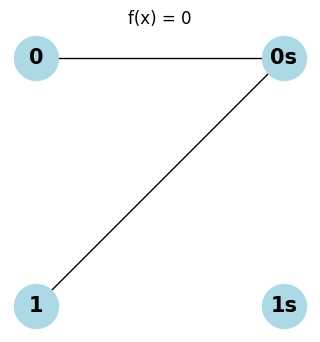

In [9]:
# Crear un grafo
G = nx.Graph()

# Agregar nodos con nombres personalizados
G.add_nodes_from(["0", "1", "0s", "1s"])  # Nodos etiquetados como "0", "1", "0s" y "1s"

# Agregar aristas para crear el cruce
G.add_edges_from([("0", "0s"), ("1", "0s")])  # Conexiones cruzadas

# Posiciones de los nodos para simular el cruce visual
pos = {
    "0": (0, 1),   # Nodo "0" arriba a la izquierda
    "1": (0, 0),   # Nodo "1" abajo a la izquierda
    "0s": (1, 1),  # Nodo "0s" abajo a la derecha
    "1s": (1, 0),  # Nodo "1s" arriba a la derecha
}

# Dibujar el grafo
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=15, font_weight="bold")
plt.title("f(x) = 0")
plt.show()





### - Matriz correpondiente



In [10]:
# Matriz de la funcion
U=np.array([[1,1],
            [0,0]])

Uf1 = deutsch_algorithm(U)
print(Uf1)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


### - Circuito Correspondiente

In [11]:
generar_cicuito(Uf1, "f(x)=0", 0, 0)

Resultado para q0=0, q1=0:
{'00': 1024}
     ┌─────────┐┌─┐   
q_0: ┤1        ├┤M├───
     │  f(x)=0 │└╥┘┌─┐
q_1: ┤0        ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 1  0 




![](images/f(x)=0_00.png)


In [12]:
generar_cicuito(Uf1, "f(x)=0", 0, 1)

Resultado para q0=0, q1=1:
{'01': 1024}
          ┌─────────┐┌─┐   
q_0: ─────┤1        ├┤M├───
     ┌───┐│  f(x)=0 │└╥┘┌─┐
q_1: ┤ X ├┤0        ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=0_01.png)


In [13]:
generar_cicuito(Uf1, "f(x)=0", 1, 0)

Resultado para q0=1, q1=0:
{'10': 1024}
     ┌───┐┌─────────┐┌─┐   
q_0: ┤ X ├┤1        ├┤M├───
     └───┘│  f(x)=0 │└╥┘┌─┐
q_1: ─────┤0        ├─╫─┤M├
          └─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=0_10.png)

In [14]:
generar_cicuito(Uf1, "f(x)=0", 1, 1)

Resultado para q0=1, q1=1:
{'11': 1024}
     ┌───┐┌─────────┐┌─┐   
q_0: ┤ X ├┤1        ├┤M├───
     ├───┤│  f(x)=0 │└╥┘┌─┐
q_1: ┤ X ├┤0        ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=0_11.png)

### f(x)=1
### - Dibujo de función


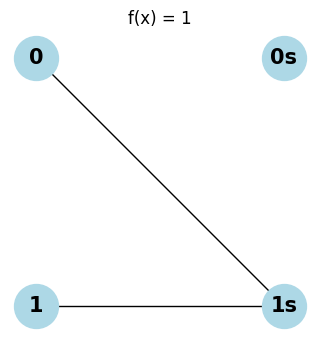

In [15]:
# Crear un grafo
G = nx.Graph()

# Agregar nodos con nombres personalizados
G.add_nodes_from(["0", "1", "0s", "1s"])  # Nodos etiquetados como "0", "1", "0s" y "1s"

# Agregar aristas para crear el cruce
G.add_edges_from([("0", "1s"), ("1", "1s")])  # Conexiones cruzadas

# Posiciones de los nodos para simular el cruce visual
pos = {
    "0": (0, 1),   # Nodo "0" arriba a la izquierda
    "1": (0, 0),   # Nodo "1" abajo a la izquierda
    "0s": (1, 1),  # Nodo "0s" abajo a la derecha
    "1s": (1, 0),  # Nodo "1s" arriba a la derecha
}

# Dibujar el grafo
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=15, font_weight="bold")
plt.title("f(x) = 1")
plt.show()


### - Matriz Correspondiente

In [16]:
# Matriz de la funcion
U1=np.array([[0,0],
            [1,1]])

Uf2 = deutsch_algorithm(U1)
print(Uf2)

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


### - Circuito correspondiente

In [17]:
generar_cicuito(Uf2, "f(x)=1", 0, 0)

Resultado para q0=0, q1=0:
{'01': 1024}
     ┌─────────┐┌─┐   
q_0: ┤1        ├┤M├───
     │  f(x)=1 │└╥┘┌─┐
q_1: ┤0        ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 1  0 



![](images/f(x)=1_00.png)

In [18]:
generar_cicuito(Uf2, "f(x)=1", 0, 1)

Resultado para q0=0, q1=1:
{'00': 1024}
          ┌─────────┐┌─┐   
q_0: ─────┤1        ├┤M├───
     ┌───┐│  f(x)=1 │└╥┘┌─┐
q_1: ┤ X ├┤0        ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=1_01.png)

In [19]:
generar_cicuito(Uf2, "f(x)=1", 1, 0)

Resultado para q0=1, q1=0:
{'11': 1024}
     ┌───┐┌─────────┐┌─┐   
q_0: ┤ X ├┤1        ├┤M├───
     └───┘│  f(x)=1 │└╥┘┌─┐
q_1: ─────┤0        ├─╫─┤M├
          └─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=1_10.png)

In [20]:
generar_cicuito(Uf2, "f(x)=1", 1, 1)

Resultado para q0=1, q1=1:
{'10': 1024}
     ┌───┐┌─────────┐┌─┐   
q_0: ┤ X ├┤1        ├┤M├───
     ├───┤│  f(x)=1 │└╥┘┌─┐
q_1: ┤ X ├┤0        ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=1_11.png)

### f(x) = x
### - Dibujo de funcion

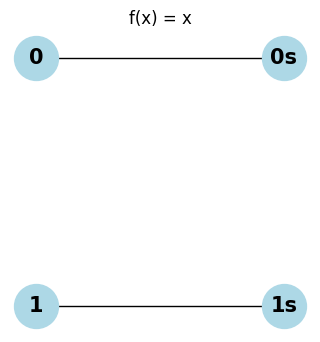

In [21]:
# Crear un grafo
G = nx.Graph()

# Agregar nodos con nombres personalizados
G.add_nodes_from(["0", "1", "0s", "1s"])  # Nodos etiquetados como "0", "1", "0s" y "1s"

# Agregar aristas para crear el cruce
G.add_edges_from([("0", "0s"), ("1", "1s")])  # Conexiones cruzadas

# Posiciones de los nodos para simular el cruce visual
pos = {
    "0": (0, 1),   # Nodo "0" arriba a la izquierda
    "1": (0, 0),   # Nodo "1" abajo a la izquierda
    "0s": (1, 1),  # Nodo "0s" abajo a la derecha
    "1s": (1, 0),  # Nodo "1s" arriba a la derecha
}

# Dibujar el grafo
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=15, font_weight="bold")
plt.title("f(x) = x")
plt.show()


### - Matriz correspondiente

In [22]:
# Matriz de la funcion
U2=np.array([[1,0],
            [0,1]])

Uf3 = deutsch_algorithm(U2)
print(Uf3)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


### - Circuito correspondiente

In [23]:
generar_cicuito(Uf3, "f(x)=x", 0, 0)

Resultado para q0=0, q1=0:
{'00': 1024}
     ┌─────────┐┌─┐   
q_0: ┤1        ├┤M├───
     │  f(x)=x │└╥┘┌─┐
q_1: ┤0        ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 1  0 



![](images/f(x)=x_00.png)

In [24]:
generar_cicuito(Uf3, "f(x)=x", 0, 1)

Resultado para q0=0, q1=1:
{'01': 1024}
          ┌─────────┐┌─┐   
q_0: ─────┤1        ├┤M├───
     ┌───┐│  f(x)=x │└╥┘┌─┐
q_1: ┤ X ├┤0        ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=x_01.png)

In [25]:
generar_cicuito(Uf3, "f(x)=x", 1, 0)

Resultado para q0=1, q1=0:
{'11': 1024}
     ┌───┐┌─────────┐┌─┐   
q_0: ┤ X ├┤1        ├┤M├───
     └───┘│  f(x)=x │└╥┘┌─┐
q_1: ─────┤0        ├─╫─┤M├
          └─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=x_10.png)

In [26]:
generar_cicuito(Uf3, "f(x)=x", 1, 1)

Resultado para q0=1, q1=1:
{'10': 1024}
     ┌───┐┌─────────┐┌─┐   
q_0: ┤ X ├┤1        ├┤M├───
     ├───┤│  f(x)=x │└╥┘┌─┐
q_1: ┤ X ├┤0        ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      1  0 



![](images/f(x)=x_11.png)

### f(x) = ~x
### - Dibujo de función

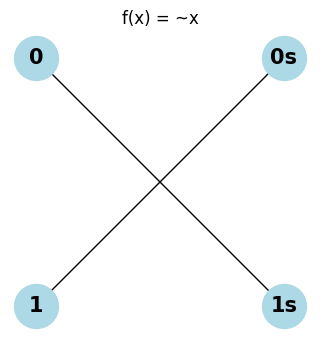

In [27]:
# Crear un grafo
G = nx.Graph()

# Agregar nodos con nombres personalizados
G.add_nodes_from(["0", "1", "0s", "1s"])  # Nodos etiquetados como "0", "1", "0s" y "1s"

# Agregar aristas para crear el cruce
G.add_edges_from([("0", "1s"), ("1", "0s")])  # Conexiones cruzadas

# Posiciones de los nodos para simular el cruce visual
pos = {
    "0": (0, 1),   # Nodo "0" arriba a la izquierda
    "1": (0, 0),   # Nodo "1" abajo a la izquierda
    "0s": (1, 1),  # Nodo "0s" abajo a la derecha
    "1s": (1, 0),  # Nodo "1s" arriba a la derecha
}

# Dibujar el grafo
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_size=15, font_weight="bold")
plt.title("f(x) = ~x")
plt.show()

### - Matriz correspondiente

In [28]:
# Matriz de la funcion
U3=np.array([[0,1],
             [1,0]])

Uf4 = deutsch_algorithm(U3)
print(Uf4)

[[0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]


### - Circuito correspondiente

In [29]:
generar_cicuito(Uf4, "f(x)=~x", 0, 0)

Resultado para q0=0, q1=0:
{'01': 1024}
     ┌──────────┐┌─┐   
q_0: ┤1         ├┤M├───
     │  f(x)=~x │└╥┘┌─┐
q_1: ┤0         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  1  0 



![](images/f(x)=~x_00.png)

In [30]:
generar_cicuito(Uf4, "f(x)=~x", 0, 1)

Resultado para q0=0, q1=1:
{'00': 1024}
          ┌──────────┐┌─┐   
q_0: ─────┤1         ├┤M├───
     ┌───┐│  f(x)=~x │└╥┘┌─┐
q_1: ┤ X ├┤0         ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 


![](images/f(x)=~x_01.png)

In [31]:
generar_cicuito(Uf4, "f(x)=~x", 1, 0)

Resultado para q0=1, q1=0:
{'10': 1024}
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     └───┘│  f(x)=~x │└╥┘┌─┐
q_1: ─────┤0         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 


![](images/f(x)=~x_10.png)

In [32]:
generar_cicuito(Uf4, "f(x)=~x", 1, 1)

Resultado para q0=1, q1=1:
{'11': 1024}
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     ├───┤│  f(x)=~x │└╥┘┌─┐
q_1: ┤ X ├┤0         ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 


![](images/f(x)=~x_11.png)

## 2. Verifique que el algoritmos de Deutsch funciona para comprobar cuáles de estas funciones son balanceadas o constantes.

### - Implementacion del algoritmo de Deutsch para f(x)=0 (Constante)

In [33]:
print(Uf1)
generar_cicuito_deutsch(Uf1, "f(x)=0")

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Resultado para f(x)=0:
{'0': 1024}
     ┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤1        ├┤ H ├┤M├
     ├───┤┌───┐│  f(x)=0 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0        ├──────╫─
     └───┘└───┘└─────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 


Como se puede ver en el resultado el bit de salida es igual a 0, por lo tanto es constante

![](images/deutsch_f(x)=0.png)

### - Implementacion del algoritmo de Deutsch para f(x)=1 (Constante)

In [34]:
print(Uf2)
generar_cicuito_deutsch(Uf2, "f(x)=1")

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]
Resultado para f(x)=1:
{'0': 1024}
     ┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤1        ├┤ H ├┤M├
     ├───┤┌───┐│  f(x)=1 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0        ├──────╫─
     └───┘└───┘└─────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 


Como se puede ver en el resultado el bit de salida es igual a 0, por lo tanto es constante

![](images/deutsch_f(x)=1.png)

### - Implementacion del algoritmo de Deutsch para f(x)=x (Balanceada)

In [35]:
print(Uf3)
generar_cicuito_deutsch(Uf3, "f(x)=x")

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]
Resultado para f(x)=x:
{'1': 1024}
     ┌───┐     ┌─────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤1        ├┤ H ├┤M├
     ├───┤┌───┐│  f(x)=x │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0        ├──────╫─
     └───┘└───┘└─────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 


Como se puede ver en el resultado el bit de salida es igual a 1, por lo tanto es balanceada

![](images/deutsch_f(x)=x.png)

### - Implementacion del algoritmo de Deutsch para f(x)=~x (Balanceada)

In [36]:
print(Uf4)
generar_cicuito_deutsch(Uf4, "f(x)=~x")

[[0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Resultado para f(x)=~x:
{'1': 1024}
     ┌───┐     ┌──────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤1         ├┤ H ├┤M├
     ├───┤┌───┐│  f(x)=~x │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0         ├──────╫─
     └───┘└───┘└──────────┘      ║ 
c: 1/════════════════════════════╩═
                                 0 


Como se puede ver en el resultado el bit de salida es igual a 1, por lo tanto es balanceada

![](images/deutsch_f(x)=~x.png)

## 3. Implemente al menos 4 funciones con n= 4 (3 balanceadas y una constante) para probar el funcionamiento del algoritmo Deustch-Jozsa
### f(x) = 0

### - Dibujo de la función

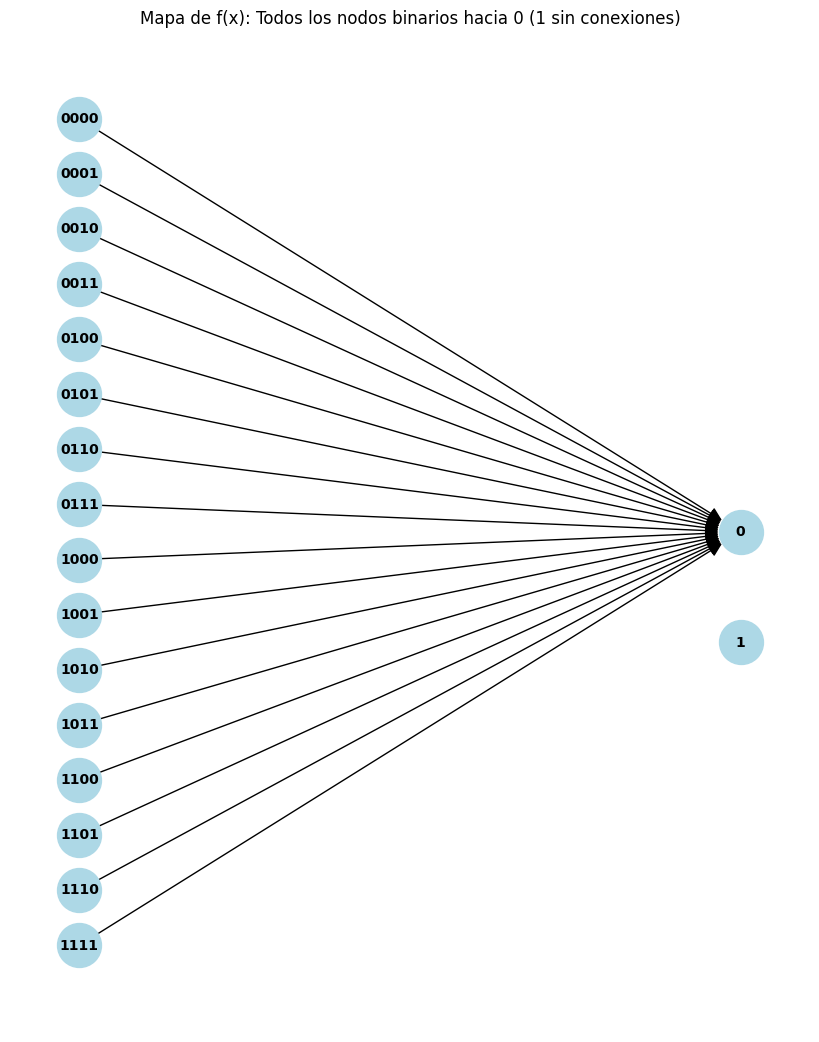

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Generar los nodos de 4 bits
nodos_binarios = [f"{i:04b}" for i in range(16)]  # Nodos de entrada (0000 a 1111)
nodos_salida = ["0", "1"]  # Nodos de salida (0 y 1)

# Agregar nodos al grafo
G.add_nodes_from(nodos_binarios)
G.add_nodes_from(nodos_salida)

# Agregar aristas desde cada nodo binario al nodo de salida "0"
for nodo in nodos_binarios:
    G.add_edge(nodo, "0")

# Posiciones para una visualización en dos columnas
pos = {}
for i, nodo in enumerate(nodos_binarios):
    pos[nodo] = (0, -i)  # Nodos de entrada en la columna izquierda
pos["0"] = (1, -7.5)  # Nodo de salida "0" en la columna derecha
pos["1"] = (1, -9.5)  # Nodo de salida "1" en la columna derecha, sin conexiones

# Dibujar el grafo
plt.figure(figsize=(8, 10))
nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    node_size=1000, font_size=10, font_weight="bold",
    arrowsize=20
)
plt.title("Mapa de f(x): Todos los nodos binarios hacia 0 (1 sin conexiones)")
plt.axis("off")
plt.show()


### - Matriz correspondiente

In [38]:
# Matriz de la funcion
np.set_printoptions(threshold=np.inf)
U4=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
             [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

Uf5 = deutsch_algorithm(U4)
print(Uf5)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### - Circuito correspondiente y pruebas

In [39]:
# Calcular el número de qubits a partir de Uf4
n = int(len(Uf5)**0.5 - 1)  # Determinar n desde las dimensiones de la matriz unitaria

# Iterar sobre todas las posibles combinaciones de x y y
for x in range(int(len(Uf5)/2)):  # y = 0, 1
    for y in range(2):  # x = 0, ..., 2^n - 1
        x_bin = decimal_a_binario(x, n)  # Convertir x a binario con n bits
        generar_circuito_v2(Uf5, "f(x)=0", x_bin, y)  # Llamar a la función para generar el circuito


4
Resultado para q0=0000, q1=0:
{'00000': 1024}
     ┌─────────┐┌─┐            
q_0: ┤4        ├┤M├────────────
     │         │└╥┘┌─┐         
q_1: ┤3        ├─╫─┤M├─────────
     │         │ ║ └╥┘┌─┐      
q_2: ┤2 f(x)=0 ├─╫──╫─┤M├──────
     │         │ ║  ║ └╥┘┌─┐   
q_3: ┤1        ├─╫──╫──╫─┤M├───
     │         │ ║  ║  ║ └╥┘┌─┐
q_4: ┤0        ├─╫──╫──╫──╫─┤M├
     └─────────┘ ║  ║  ║  ║ └╥┘
c: 5/════════════╩══╩══╩══╩══╩═
                 4  3  2  1  0 
4
Resultado para q0=0000, q1=1:
{'00001': 1024}
          ┌─────────┐┌─┐            
q_0: ─────┤4        ├┤M├────────────
          │         │└╥┘┌─┐         
q_1: ─────┤3        ├─╫─┤M├─────────
          │         │ ║ └╥┘┌─┐      
q_2: ─────┤2 f(x)=0 ├─╫──╫─┤M├──────
          │         │ ║  ║ └╥┘┌─┐   
q_3: ─────┤1        ├─╫──╫──╫─┤M├───
     ┌───┐│         │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤0        ├─╫──╫──╫──╫─┤M├
     └───┘└─────────┘ ║  ║  ║  ║ └╥┘
c: 5/═════════════════╩══╩══╩══╩══╩═
                      4  3  2  1  0 
4
Resul

### - Prueba del experimento Deutsch-Jozsa

In [40]:
generar_cicuito_deutsch_jozsa(Uf5, "f(x)=0")

Resultado para f(x)=0
{'0000': 1024}
     ┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤4        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤3        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 f(x)=0 ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤1        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤0        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                3  2  1  0 


Como se puede ver todos los qubits de salida van a 0 por lo tanto se puede decir que la funcion es constante.

### f(x) = primer quibit de entrada excepto para 0001 y 1110
### - Dibujo de la función

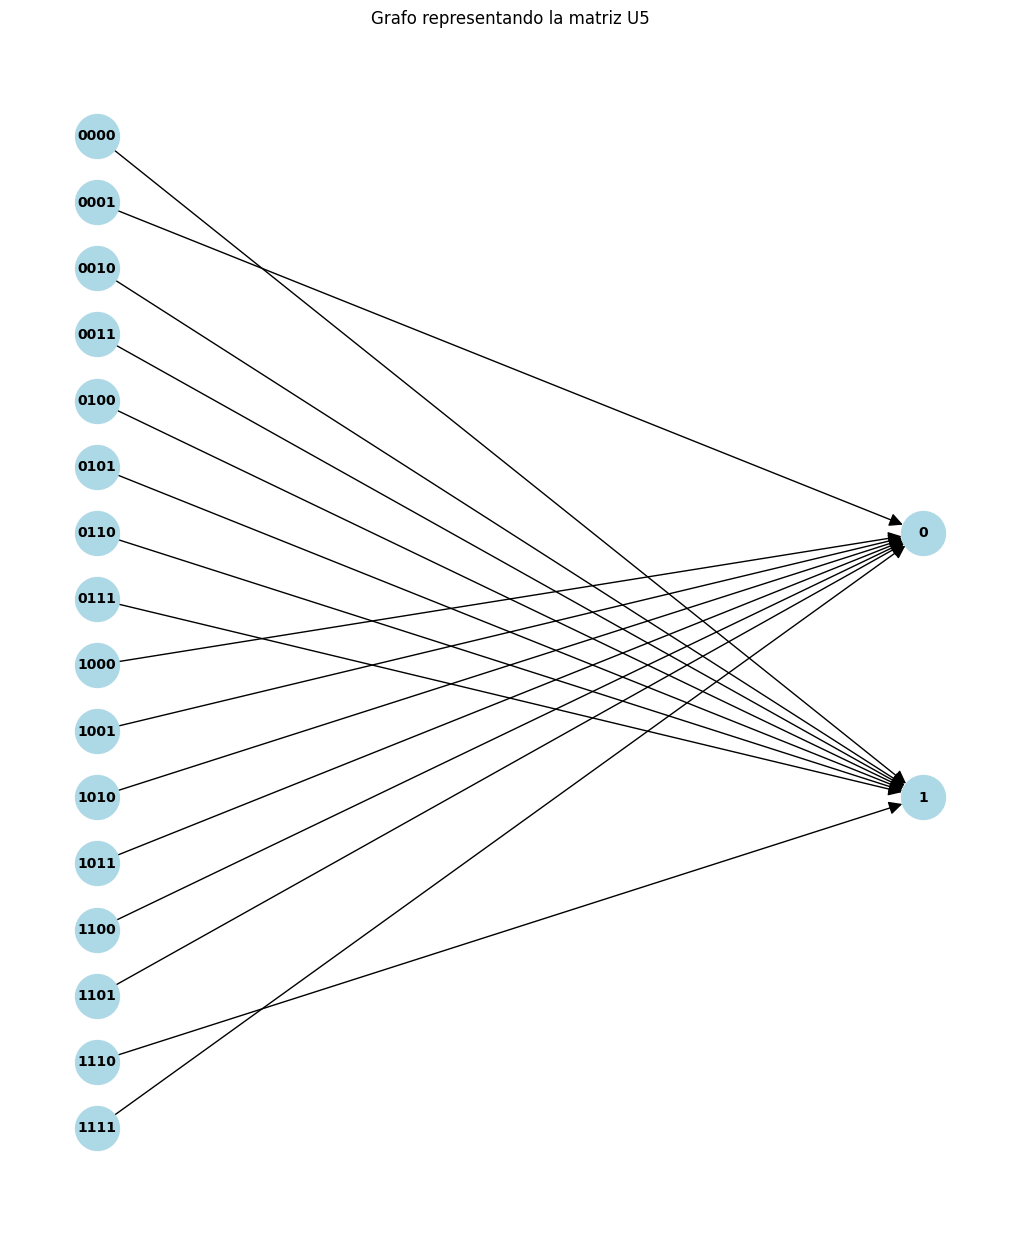

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Matriz U5
U5 = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
])

# Crear el grafo dirigido
G = nx.DiGraph()

# Generar los nodos de entrada (0000 a 1111)
nodos_binarios = [f"{i:04b}" for i in range(16)]  # 4 bits

# Nodos de salida (0 y 1)
nodos_salida = ["0", "1"]

# Agregar nodos al grafo
G.add_nodes_from(nodos_binarios)
G.add_nodes_from(nodos_salida)

# Agregar aristas en función de la matriz U5
for col, nodo_binario in enumerate(nodos_binarios):  # Columnas representan nodos binarios
    for fila, nodo_salida in enumerate(nodos_salida):  # Filas representan nodos de salida
        if U5[fila, col] == 1:  # Si hay conexión en la matriz
            G.add_edge(nodo_binario, nodo_salida)

# Posiciones para una visualización organizada
pos = {}
# Posicionar nodos binarios (entrada) en una columna
for i, nodo in enumerate(nodos_binarios):
    pos[nodo] = (0, -i)  # Nodos de entrada a la izquierda
# Posicionar nodos de salida (0 y 1) en otra columna
pos["0"] = (1, -6)  # Nodo de salida "0" a la derecha
pos["1"] = (1, -10)  # Nodo de salida "1" a la derecha

# Dibujar el grafo
plt.figure(figsize=(10, 12))
nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    node_size=1000, font_size=10, font_weight="bold",
    arrowsize=20
)
plt.title("Grafo representando la matriz U5")
plt.axis("off")
plt.show()


### - Matriz correspondiente

In [42]:
# Matriz de la funcion
np.set_printoptions(threshold=np.inf)
U5=np.array([[0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,1],
             [1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0]])

Uf6 = deutsch_algorithm(U5)
print(Uf6)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### - Circuitos correspondientes

In [43]:
# Calcular el número de qubits a partir de Uf4
n = int(len(Uf6)**0.5 - 1)  # Determinar n desde las dimensiones de la matriz unitaria

# Iterar sobre todas las posibles combinaciones de x y y
for x in range(int(len(Uf6)/2)):  # y = 0, 1
    for y in range(2):  # x = 0, ..., 2^n - 1
        x_bin = decimal_a_binario(x, n)  # Convertir x a binario con n bits
        generar_circuito_v2(Uf6, "f(x)", x_bin, y)  # Llamar a la función para generar el circuito

4
Resultado para q0=0000, q1=0:
{'00001': 1024}
     ┌───────┐┌─┐            
q_0: ┤4      ├┤M├────────────
     │       │└╥┘┌─┐         
q_1: ┤3      ├─╫─┤M├─────────
     │       │ ║ └╥┘┌─┐      
q_2: ┤2 f(x) ├─╫──╫─┤M├──────
     │       │ ║  ║ └╥┘┌─┐   
q_3: ┤1      ├─╫──╫──╫─┤M├───
     │       │ ║  ║  ║ └╥┘┌─┐
q_4: ┤0      ├─╫──╫──╫──╫─┤M├
     └───────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════╩══╩══╩══╩══╩═
               4  3  2  1  0 
4
Resultado para q0=0000, q1=1:
{'00000': 1024}
          ┌───────┐┌─┐            
q_0: ─────┤4      ├┤M├────────────
          │       │└╥┘┌─┐         
q_1: ─────┤3      ├─╫─┤M├─────────
          │       │ ║ └╥┘┌─┐      
q_2: ─────┤2 f(x) ├─╫──╫─┤M├──────
          │       │ ║  ║ └╥┘┌─┐   
q_3: ─────┤1      ├─╫──╫──╫─┤M├───
     ┌───┐│       │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤0      ├─╫──╫──╫──╫─┤M├
     └───┘└───────┘ ║  ║  ║  ║ └╥┘
c: 5/═══════════════╩══╩══╩══╩══╩═
                    4  3  2  1  0 
4
Resultado para q0=0001, q1=0:
{'00010': 1024}
          ┌

### - Prueba del experimento Deutsch-Jozsa

In [44]:
generar_cicuito_deutsch_jozsa(Uf6, "f(x)")

Resultado para f(x)
{'1000': 571, '1110': 74, '0100': 57, '1101': 59, '1011': 75, '0010': 72, '0111': 59, '0001': 57}
     ┌───┐     ┌───────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤4      ├┤ H ├┤M├─────────
     ├───┤     │       │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤3      ├┤ H ├─╫─┤M├──────
     ├───┤     │       │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 f(x) ├┤ H ├─╫──╫─┤M├───
     ├───┤     │       │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤1      ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│       │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤0      ├──────╫──╫──╫──╫─
     └───┘└───┘└───────┘      ║  ║  ║  ║ 
c: 4/═════════════════════════╩══╩══╩══╩═
                              3  2  1  0 


Como se puede ver todos los qubits de salida son diferentes de 0000 por lo tanto no se puede decir que la función es constante.

### f(x) = Primer qubit
### - Dibujo de la función  

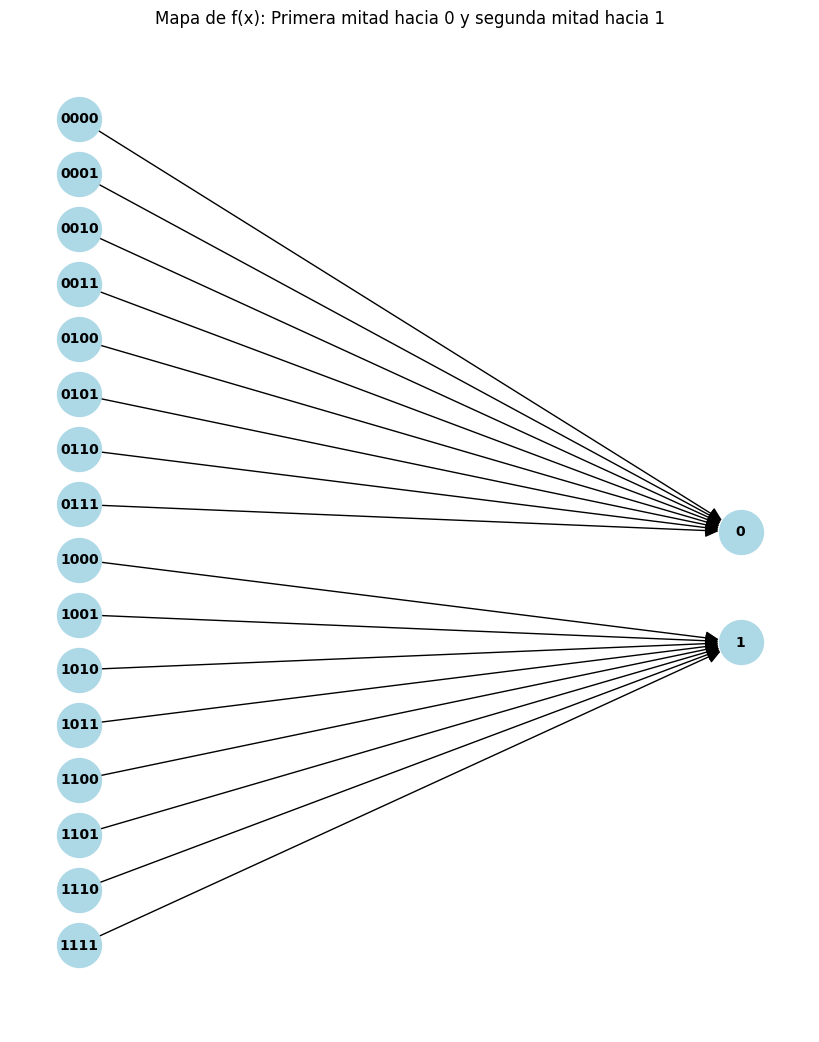

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Generar los nodos de 4 bits
nodos_binarios = [f"{i:04b}" for i in range(16)]  # Nodos de entrada (0000 a 1111)
nodos_salida = ["0", "1"]  # Nodos de salida (0 y 1)

# Agregar nodos al grafo
G.add_nodes_from(nodos_binarios)
G.add_nodes_from(nodos_salida)

# Dividir los nodos binarios en dos grupos
n = len(nodos_binarios)
mitad = n // 2

# Agregar aristas desde los primeros nodos binarios al nodo de salida "0" 
for nodo in nodos_binarios[:mitad]:
    G.add_edge(nodo, "0")

# Agregar aristas desde los segundos nodos binarios al nodo de salida "1"
for nodo in nodos_binarios[mitad:]:
    G.add_edge(nodo, "1")

# Posiciones para una visualización en dos columnas
pos = {}
for i, nodo in enumerate(nodos_binarios):
    pos[nodo] = (0, -i)  # Nodos de entrada en la columna izquierda
pos["0"] = (1, -7.5)  # Nodo de salida "0" en la columna derecha
pos["1"] = (1, -9.5)  # Nodo de salida "1" en la columna derecha, sin conexiones

# Dibujar el grafo
plt.figure(figsize=(8, 10))
nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    node_size=1000, font_size=10, font_weight="bold",
    arrowsize=20
)
plt.title("Mapa de f(x): Primera mitad hacia 0 y segunda mitad hacia 1")
plt.axis("off")
plt.show()


### - Matriz correspondiente

In [46]:
# Matriz de la funcion
np.set_printoptions(threshold=np.inf)
U6=np.array([[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]])

Uf7 = deutsch_algorithm(U6)
print(Uf7)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

### - Circuitos correspondientes

In [47]:
# Calcular el número de qubits a partir de Uf4
n = int(len(Uf7)**0.5 - 1)  # Determinar n desde las dimensiones de la matriz unitaria

# Iterar sobre todas las posibles combinaciones de x y y
for x in range(int(len(Uf7)/2)):  # y = 0, 1
    for y in range(2):  # x = 0, ..., 2^n - 1
        x_bin = decimal_a_binario(x, n)  # Convertir x a binario con n bits
        generar_circuito_v2(Uf7, "f(x)=primer qubit de entrada", x_bin, y)  # Llamar a la función para generar el circuito

4
Resultado para q0=0000, q1=0:
{'00000': 1024}
     ┌───────────────────────────────┐┌─┐            
q_0: ┤4                              ├┤M├────────────
     │                               │└╥┘┌─┐         
q_1: ┤3                              ├─╫─┤M├─────────
     │                               │ ║ └╥┘┌─┐      
q_2: ┤2 f(x)=primer qubit de entrada ├─╫──╫─┤M├──────
     │                               │ ║  ║ └╥┘┌─┐   
q_3: ┤1                              ├─╫──╫──╫─┤M├───
     │                               │ ║  ║  ║ └╥┘┌─┐
q_4: ┤0                              ├─╫──╫──╫──╫─┤M├
     └───────────────────────────────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════════════════════════╩══╩══╩══╩══╩═
                                       4  3  2  1  0 
4
Resultado para q0=0000, q1=1:
{'00001': 1024}
          ┌───────────────────────────────┐┌─┐            
q_0: ─────┤4                              ├┤M├────────────
          │                               │└╥┘┌─┐         
q_1: ─────┤3             

### - Prueba del experimento Deutsch-Jozsa

In [48]:
generar_cicuito_deutsch_jozsa(Uf7, "f(x)=primer qubit de entrada")

Resultado para f(x)=primer qubit de entrada
{'1000': 1024}
     ┌───┐     ┌───────────────────────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤4                              ├┤ H ├┤M├─────────
     ├───┤     │                               │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤3                              ├┤ H ├─╫─┤M├──────
     ├───┤     │                               │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 f(x)=primer qubit de entrada ├┤ H ├─╫──╫─┤M├───
     ├───┤     │                               │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤1                              ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│                               │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤0                              ├──────╫──╫──╫──╫─
     └───┘└───┘└───────────────────────────────┘      ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════╩══╩══╩══╩═
                                                      3  2  1  0 


Como se puede ver la prueba arroja que los quibits son diferentes de 0000, por lo tanto la funcion no es valanceada.

### f(x) = negacion del primer qubit de entrada
### Dibujo de la funcion

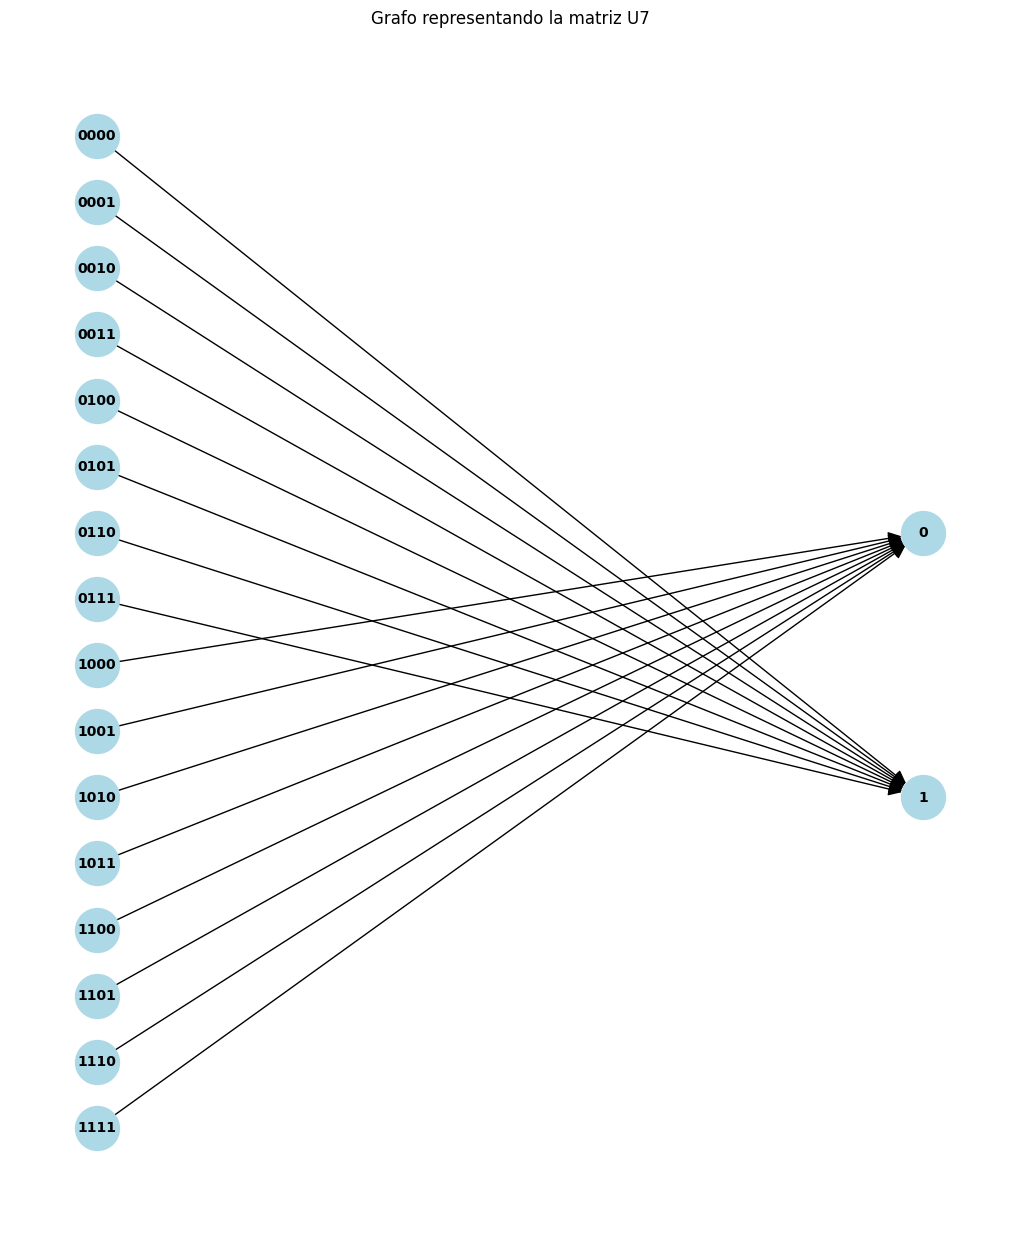

In [49]:
U7 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Crear el grafo dirigido
G = nx.DiGraph()

# Generar los nodos de entrada (0000 a 1111)
nodos_binarios = [f"{i:04b}" for i in range(16)]  # 4 bits

# Nodos de salida (0 y 1)
nodos_salida = ["0", "1"]

# Agregar nodos al grafo
G.add_nodes_from(nodos_binarios)
G.add_nodes_from(nodos_salida)

# Agregar aristas en función de la matriz U5
for col, nodo_binario in enumerate(nodos_binarios):  # Columnas representan nodos binarios
    for fila, nodo_salida in enumerate(nodos_salida):  # Filas representan nodos de salida
        if U7[fila, col] == 1:  # Si hay conexión en la matriz
            G.add_edge(nodo_binario, nodo_salida)

# Posiciones para una visualización organizada
pos = {}
# Posicionar nodos binarios (entrada) en una columna
for i, nodo in enumerate(nodos_binarios):
    pos[nodo] = (0, -i)  # Nodos de entrada a la izquierda
# Posicionar nodos de salida (0 y 1) en otra columna
pos["0"] = (1, -6)  # Nodo de salida "0" a la derecha
pos["1"] = (1, -10)  # Nodo de salida "1" a la derecha

# Dibujar el grafo
plt.figure(figsize=(10, 12))
nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    node_size=1000, font_size=10, font_weight="bold",
    arrowsize=20
)
plt.title("Grafo representando la matriz U7")
plt.axis("off")
plt.show()

In [50]:
# Matriz de la funcion
np.set_printoptions(threshold=np.inf)
U7 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
])

Uf8 = deutsch_algorithm(U7)
print(Uf8)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [51]:
# Calcular el número de qubits a partir de Uf4
n = int(len(Uf8)**0.5 - 1)  # Determinar n desde las dimensiones de la matriz unitaria

# Iterar sobre todas las posibles combinaciones de x y y
for x in range(int(len(Uf8)/2)):  # y = 0, 1
    for y in range(2):  # x = 0, ..., 2^n - 1
        x_bin = decimal_a_binario(x, n)  # Convertir x a binario con n bits
        generar_circuito_v2(Uf8, "f(x)=negacion de primer qubit de entrada", x_bin, y)  # Llamar a la función para generar el circuito

4
Resultado para q0=0000, q1=0:
{'00001': 1024}
     ┌───────────────────────────────────────────┐┌─┐            
q_0: ┤4                                          ├┤M├────────────
     │                                           │└╥┘┌─┐         
q_1: ┤3                                          ├─╫─┤M├─────────
     │                                           │ ║ └╥┘┌─┐      
q_2: ┤2 f(x)=negacion de primer qubit de entrada ├─╫──╫─┤M├──────
     │                                           │ ║  ║ └╥┘┌─┐   
q_3: ┤1                                          ├─╫──╫──╫─┤M├───
     │                                           │ ║  ║  ║ └╥┘┌─┐
q_4: ┤0                                          ├─╫──╫──╫──╫─┤M├
     └───────────────────────────────────────────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                   4  3  2  1  0 
4
Resultado para q0=0000, q1=1:
{'00000': 1024}
          ┌───────────────────────────────────

In [52]:
generar_cicuito_deutsch_jozsa(Uf8, "f(x)=negacion de primezr qubit de entrada")

Resultado para f(x)=negacion de primezr qubit de entrada
{'1000': 1024}
     ┌───┐     ┌────────────────────────────────────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤4                                           ├┤ H ├┤M├─────────
     ├───┤     │                                            │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤3                                           ├┤ H ├─╫─┤M├──────
     ├───┤     │                                            │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 f(x)=negacion de primezr qubit de entrada ├┤ H ├─╫──╫─┤M├───
     ├───┤     │                                            │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤1                                           ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│                                            │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤0                                           ├──────╫──╫──╫──╫─
     └───┘└───┘└────────────────────────────────────────────┘      ║  ║  ║  ║ 
c: 4/══════════════════════════════════════════════════════